In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft, fft, fftfreq
%matplotlib inline

In [2]:
arc = np.genfromtxt('monthrg.dat') #Importamos los datos.
ann0 = arc[:,0] #Año en que se toma el dato
mes0 = arc[:,1] #Mes en que se toma el dato
d0 = arc[:,2] #Número de días en que se toma el dato
ave0 = arc[:,3] #Promedio de manchas solares

ann = []
mes = []
ave = []
for i in range(len(d0)): #Tomamos únicamente las posiciones en que efectivamente hubo toma de datos,
    if(d0[i]!=0):
        ann.append(ann0[i])
        mes.append(mes0[i])
        ave.append(ave0[i])

ann = [ann[i] + mes[i]/12. for i in range(len(ann))] #Tomamos el año como un decimal, añadiendo el tiempo correspondiente a en qué mes se toman los datos

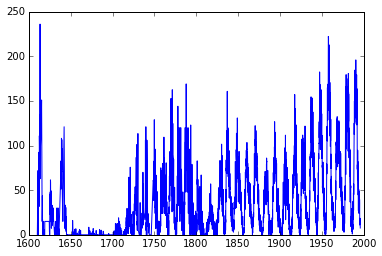

In [3]:
plt.plot(ann,ave)

Vemos como varía el ciclo solar 

In [4]:
N=len(ann)
fouave = fft(ave) #transformada de Fourier de los datos
fre = fftfreq(N, 1./12.) #frecuencia

In [8]:
maxim = max(np.abs(fouave)[fre>0.01]) #Buscamos el máximo sobre todos los datos transformados

a = 0
for i in range(len(fouave[fre>0.01])):
    if(np.abs(fouave[fre>0.01][i])==maxim): #Buscamos el índice donde está el máximo
        a = i
        
1/fre[a] #Calculamos el periodo

12.324404761904761

El periodo solar es de 12 años aproximadamente.

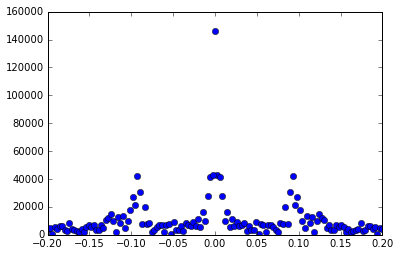

In [7]:
plt.plot(fre,np.abs(fouave),'o') #Graficamos los datos transformados
plt.xlim(-0.2,0.2)
plt.show()

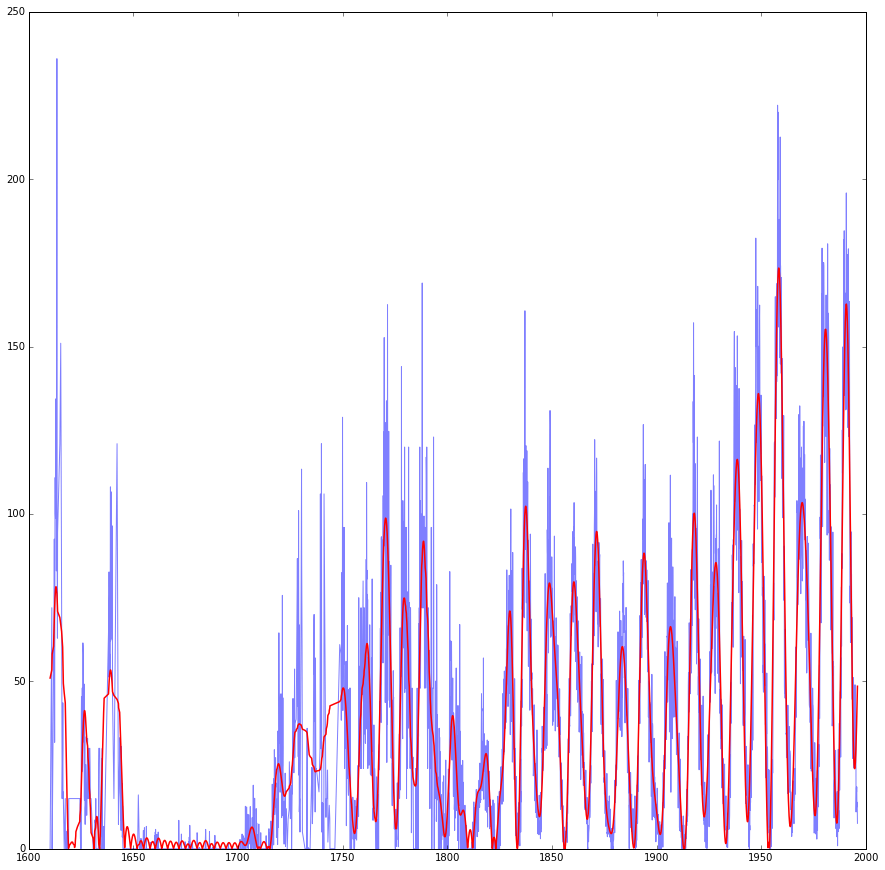

In [8]:
fouave[np.abs(fre) >= 0.18 ] = 0 #Eliminamos los datos con  frecuencias mayores a cierto valor para hacer el filtrado pues vemos que los valores significativos están alrededor del cero 
newave = ifft(fouave) #Hacemos la transformada inversa de Fourier

plt.figure(figsize=(15,15)) #Hacemos la gráfica de la señal original y de la señal filtrada.
plt.plot(ann,ave,'b',alpha=0.5)
plt.plot(ann,np.abs(newave),'r',linewidth=1.5)
plt.show()

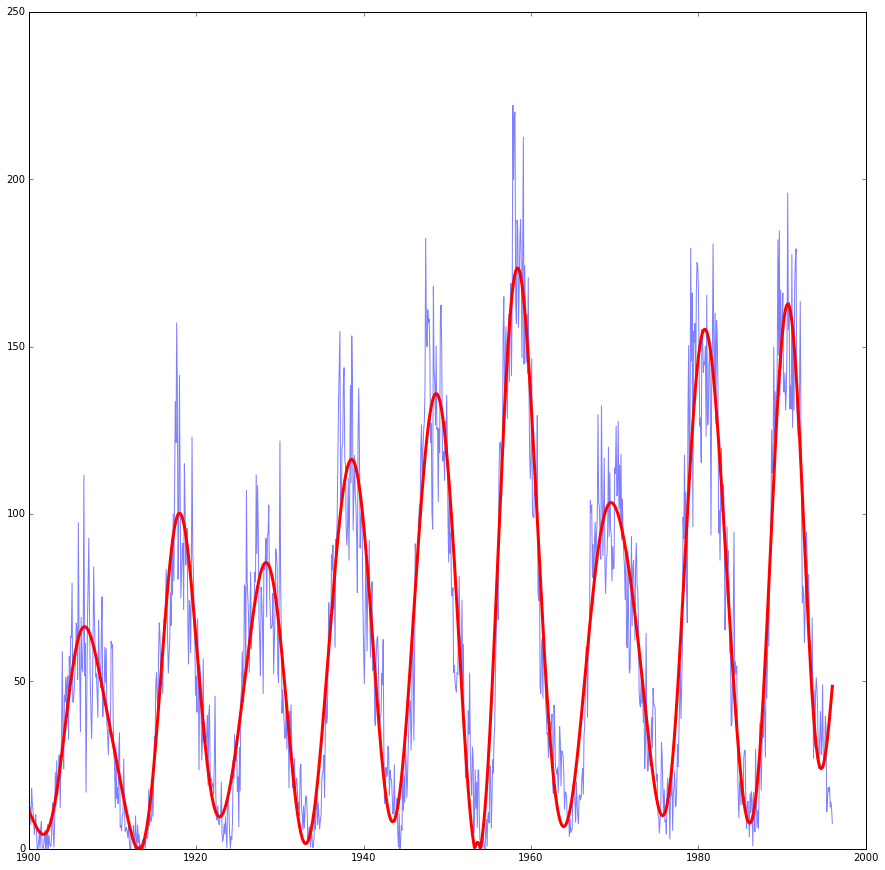

In [9]:
plt.figure(figsize=(15,15)) #Graficamos sólo desde el año 1900
plt.plot(ann[2988:],ave[2988:],'b',alpha=0.5)
plt.plot(ann[2988:],np.abs(newave[2988:]),'r',linewidth=3.)
plt.show()